
# Linear regression example

This example uses the only one feature of the `diabetes` dataset, in order to illustrate a two-dimensional plot of this regression technique. 

The material is taken from [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## Load dataset

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Extract data from dataset
Note: Each newaxis object in the selection tuple serves to expand the dimensions of the resulting selection by one unit-length dimension. The added dimension is the position of the newaxis object in the selection tuple.

In [5]:
# Use only one feature
feature_number = 2 # BMI values
diabetes_X = diabetes.data[:, np.newaxis, feature_number]

In [6]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## Split your data into training and test

In [7]:
# play with list manipulation
l = [1,2,3,4,5]

In [8]:
# python way for extracting 1st and 2nd list item
l[:-3]

[1, 2]

In [9]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

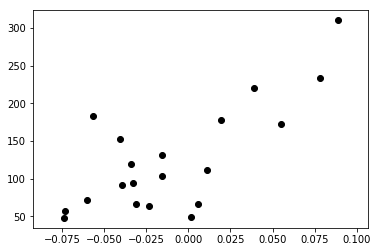

In [10]:
# Plot the test data
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.show()

## Linear regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and an independent variables. 

- [Wikipedia reference](https://en.wikipedia.org/wiki/Linear_regression)
- [scikit reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Make predictions

In [12]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

## Evaluation

### Mean squared error
A risk metric corresponding to the expected value of the squared (quadratic) error or loss.

$$ 
{\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.} 
$$

- [scikit reference](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
- [Wikipedia reference](https://en.wikipedia.org/wiki/Mean_squared_error)

### $R^2$-score
It provides a measure of how well future samples are likely to be predicted by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


In [13]:
# The coefficients -- Estimated coefficients for the linear regression problem
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
R2 score: 0.47


## Plot results

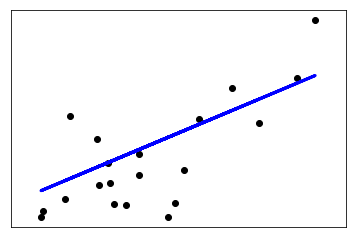

In [14]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

## EXERCISE 1

Use a different feature in the `diabetes` dataset. That is, substitute `feature_number` with a number between 0 and 9 (number of features). 